In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram

[['0', '0', '1', '1'], ['0', '1', '0', '0'], ['1', '0', '1', '0']]


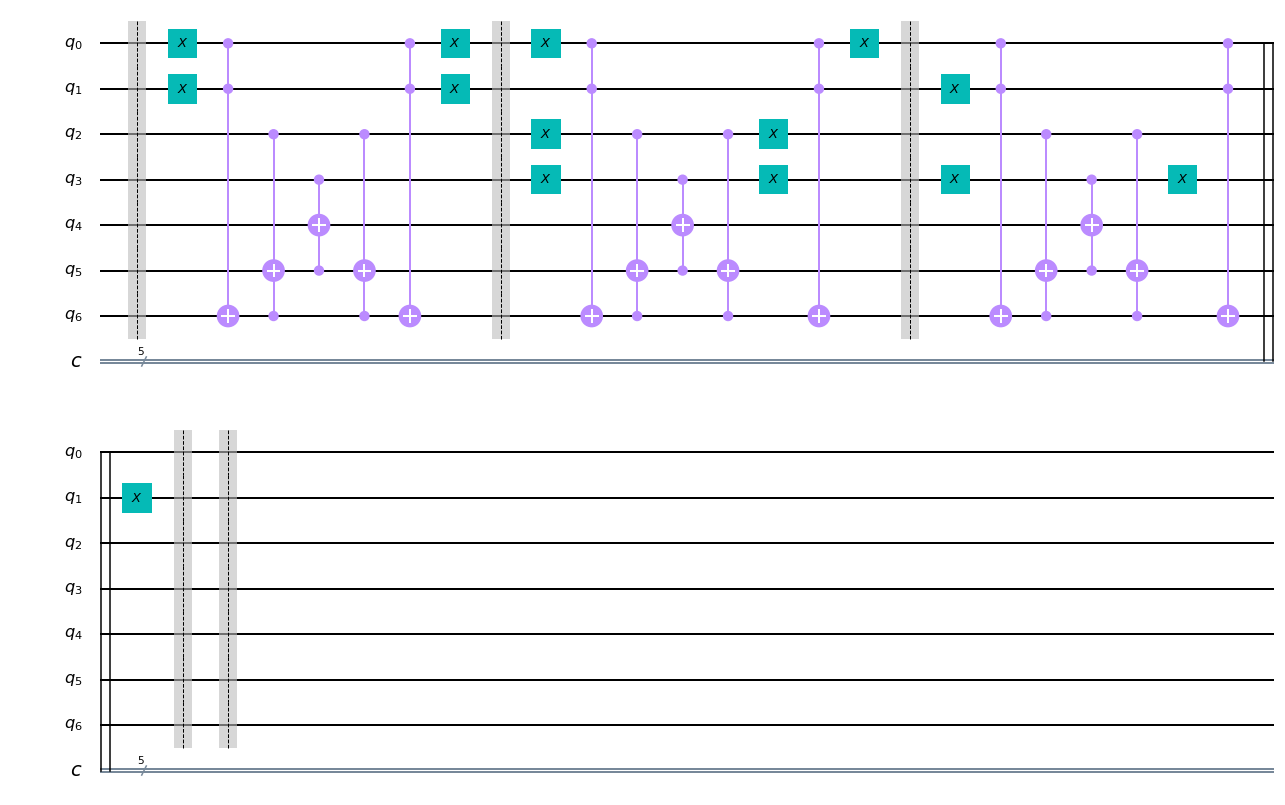

In [6]:
#ship_coords = (10, 14, 15, 0, 1, 8, 9) # Imagina un mapa como este:
ship_coords = [3, 4, 10]
binary_coords = []

#  0    1    2    3  
#  4    5    6    7
#  8    9    10   11
#  12   13   14   15


for i in range(len(ship_coords)):
    binary_coords.append(list(format(ship_coords[i], '04b')))

print(binary_coords)

game_operator = QuantumCircuit(7, 5)
game_operator.barrier(range(7))

for coord in binary_coords:
    
    for j, i in reversed(list(enumerate(coord))):
        if i == '0':
            game_operator.x(j)
            
    game_operator.ccx(0,1,6)
    game_operator.ccx(2,6,5)
    game_operator.ccx(3,5,4)
    game_operator.ccx(2,6,5)
    game_operator.ccx(0,1,6)
    
    for j, i in reversed(list(enumerate(coord))):
        if i == '0':
            game_operator.x(j)
    game_operator.barrier(range(7))
            
game_operator.barrier(range(7))


"""   game_operator haría lo siguiente:

       _____
|x>---|     |---|x>
      |  G  |
|0>---|_____|---|G(x)>


siendo:  | G(x) = 0 si es agua
         | G(x) = 1 si es tocado


"""

game_operator.draw(output = 'mpl')

In [8]:
guess = [10]
print("Original Ship Positions: ")
print(ship_coords)
print()
print("Results:")
for shot in guess:
    quest_operator = QuantumCircuit(7, 5)
    binary_guess = format(shot, '04b')
    i = 0
    for qubit in binary_guess:
        if (qubit == '1'): quest_operator.x(i)
        i += 1

    circ = quest_operator + game_operator

    circ.measure(range(5), range(5))
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, shots=1)
    result = job.result()
    counts = result.get_counts(circ)
    print("Shot: %s - %s" % (shot, list(counts.keys())[0][:1]))

Original Ship Positions: 
[3, 4, 10]

Results:
Shot: 10 - 1


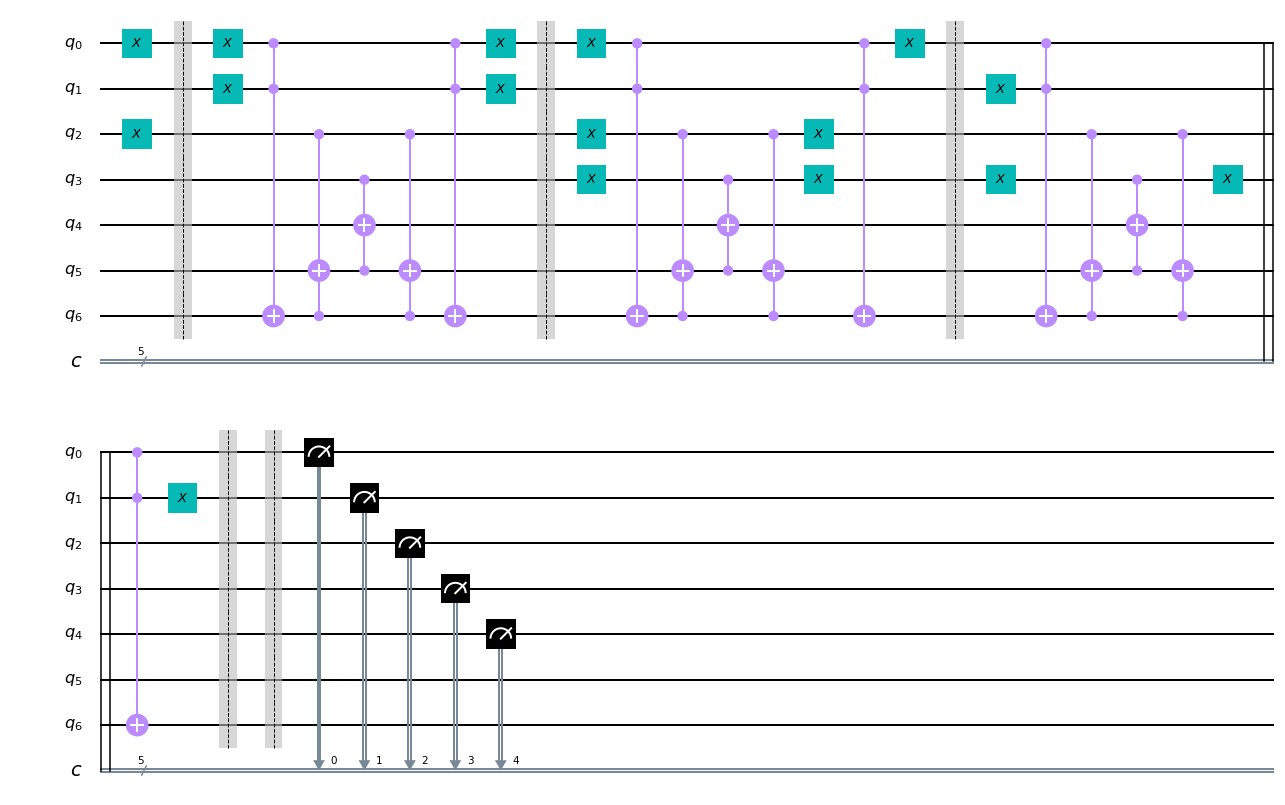

In [9]:
circ.draw('mpl')

In [5]:
"""
Grover Approach!!
"""
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

def phase_oracle(n, solutions, name = 'Oracle'):
    qc = QuantumCircuit(n, name=name)

    oracle_matrix = np.identity(2**n)
    for solution in solutions:
        oracle_matrix[solution, solution] = -1
    qc.unitary(Operator(oracle_matrix), range(n))
    
    return qc

def diffuser(n):
    
    qc = QuantumCircuit(n, name='Diffuser')
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    
    return qc

def Grover(n, solutions):
    
    qc = QuantumCircuit(n, n)
    
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(solutions))))
    print(f'{n} qubits, basis states {solutions} marked, {r} rounds')
    
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n, solutions), range(n))
        qc.append(diffuser(n), range(n))
        
    qc.measure(range(n), range(n))
    return qc

In [9]:
# Board. Lets go crazy
#  | 0  1  2 .... 16 |
#  | .  .  .  .   .  |
#  |240 241  ...  255|

board_size = 256 # n = 8
ship_coords = [3, 4, 10, 200, 201, 202, 50, 51, 51]

circuit = Grover(8, ship_coords)
circuit.draw(output='text')

8 qubits, basis states [3, 4, 10, 200, 201, 202, 50, 51, 51] marked, 4 rounds


┌───┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0          ├┤0        ├┤0          ├┤0        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_1: ┤ H ├┤1        ├┤1          ├┤1        ├┤1          ├┤1        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_2: ┤ H ├┤2        ├┤2          ├┤2        ├┤2          ├┤2        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_3: ┤ H ├┤3        ├┤3          ├┤3        ├┤3          ├┤3        ├»
     ├───┤│  Oracle ││  Diffuser ││  Oracle ││  Diffuser ││  Oracle │»
q_4: ┤ H ├┤4        ├┤4          ├┤4        ├┤4          ├┤4        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_5: ┤ H ├┤5        ├┤5          ├┤5        ├┤5          ├┤5        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_6: ┤ H ├┤6        ├┤6          ├┤6        ├┤6          ├┤6        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_7: ┤ H ├┤7        ├┤7          ├┤7        ├┤7          ├┤7        ├»
     └───┘└─────────┘└───────────┘└─────────┘└───────────┘└─────────┘»
c_0: ════════════════════════════════════════════════════════════════»
                                                                     »
c_1: ════════════════════════════════════════════════════════════════»
                                                                     »
c_2: ════════════════════════════════════════════════════════════════»
                                                                     »
c_3: ════════════════════════════════════════════════════════════════»
                                                                     »
c_4: ════════════════════════════════════════════════════════════════»
                                                                     »
c_5: ════════════════════════════════════════════════════════════════»
                                                                     »
c_6: ════════════════════════════════════════════════════════════════»
                                                                     »
c_7: ════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌───────────┐┌─────────┐┌───────────┐┌─┐                     
«q_0: ┤0          ├┤0        ├┤0          ├┤M├─────────────────────
«     │           ││         ││           │└╥┘┌─┐                  
«q_1: ┤1          ├┤1        ├┤1          ├─╫─┤M├──────────────────
«     │           ││         ││           │ ║ └╥┘┌─┐               
«q_2: ┤2          ├┤2        ├┤2          ├─╫──╫─┤M├───────────────
«     │           ││         ││           │ ║  ║ └╥┘┌─┐            
«q_3: ┤3          ├┤3        ├┤3          ├─╫──╫──╫─┤M├────────────
«     │  Diffuser ││  Oracle ││  Diffuser │ ║  ║  ║ └╥┘┌─┐         
«q_4: ┤4          ├┤4        ├┤4          ├─╫──╫──╫──╫─┤M├─────────
«     │           ││         ││           │ ║  ║  ║  ║ └╥┘┌─┐      
«q_5: ┤5          ├┤5        ├┤5          ├─╫──╫──╫──╫──╫─┤M├──────
«     │           ││         ││           │ ║  ║  ║  ║  ║ └╥┘┌─┐   
«q_6: ┤6          ├┤6        ├┤6          ├─╫──╫──╫──╫──╫──╫─┤M├───
«     │           ││         ││           │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«q_7: ┤7          ├┤7        ├┤7          ├─╫──╫──╫──╫──╫──╫──╫─┤M├
«     └───────────┘└─────────┘└───────────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
«c_0: ══════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬═
«                                              ║  ║  ║  ║  ║  ║  ║ 
«c_1: ═════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬═
«                                                 ║  ║  ║  ║  ║  ║ 
«c_2: ════════════════════════════════════════════╩══╬══╬══╬══╬══╬═
«                                                    ║  ║  ║  ║  ║ 
«c_3: ═══════════════════════════════════════════════╩══╬══╬══╬══╬═
«                             

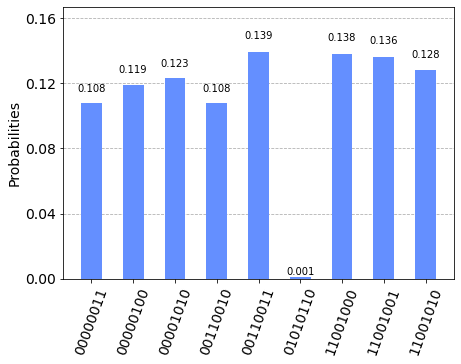

In [10]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend=simulator, shots=1000).result().get_counts(circuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)